#**BOOK RECOMMENDATION SYSTEM**

#**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.


<br>In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

<br>Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. <br><br>The main objective is to create a book recommendation system for users.

# **Project Summary**

A Book Recommendation System which recommends the users a selection of books based on their interests.

Data used for this project was taken from here

##**1. Data loading, Cleaning and Pre-Processing:**

The dataset consists of three dataframes; Books, Users, and Ratings. Data from all three tables are cleaned and preprocessed separately as defined below briefly:
<br><br>**For Users Table:**

Checked for null values in the table. The Age column has more than 1 lakh null values.
Check for unique values present in the Age column. There are many invalid ages present like 0 or 244.
By keeping the valid age range of readers as 10 to 80 replace null values and invalid ages in the Age column with the mean of valid ages.
The location column has 3 values city, state, and country. This column has been treated and only country information is kept for further analysis. There were some absurd values and misspelled country names in country column which were treated.
Duplicate entries were dropped from the table

<br><br>**For Books Table:**

Droped all three Image URL features.

Checked for the unique years of publications. Two values in the year column are publishers. Also, for three tuples name of the author of the book was merged with the title of the book. Manually set the values for these three above obtained tuples for each of their features using the ISBN of the book.
Convert the type of the years of publications feature to the integer.

By keeping the range of valid years as less than 2004 and not 0, replace all invalid years with the median of the publication year.

<br><br>**For Ratings Table:**

Checked for null values in the table.
Check for Rating column and User-ID column to be an integer.
Removal of punctuation from ISBN column values and if that resulting ISBN is available in the book dataset only then considering else drop that entity.

Divided the data in two dataframe having explicit(non zero ratings)and implicit ratings.

Checked for missing values ,there were none. Added a column of average rating of the book to the dataframe.
<br><br>
## **2. Algorithms Implemented:**
**2.1 Popularity Based Recommendation :**

Recommendation using Average Weighted Rating
We have calculated the weighted score using the below formula for all the books and recommended the books with the highest score.

score= t/(t+m)∗a + m/(m+t)∗c

where,
t represents the total number of ratings received by the book
m represents the minimum number of total ratings considered to be included
a represents the average rating of the book and,
c represents the mean rating of all the books.


2.3 User-Item Collaborative Filtering Recommendation
Collaborative Filtering Recommendation System works by considering user ratings and finds cosine similarities in ratings by several users to recommend books. To implement this, we took only those books' data that have at least 50 ratings in all.
<br><br>
**2.2 Nearest Neighbour Based Recommendation:**

To train the Nearest Neighbours model, we have created a compressed sparse row matrix taking ratings of each Book by each User individually. This matrix is used to train the Nearest Neighbours model and then to find n nearest neighbors using the cosine similarity metric.
<br><br>
**2.3 Correlation Based Recommendation:**

For this model, we have created the correlation matrix considering only those books which have total ratings of more than 100 and users who have rated more than 5 books. Then a user-book rating matrix is created. For the input book using the correlation matrix, top books are recommended.
<br><br>
**2.4 Singular value decomposition collaborative filtering( User-Item):**

SVD which is a Latent factor model is used which compresses user-item matrix into a low-dimensional representation in terms of latent factors and can handle the sparsity of the original matrix. Recommendations are made on basis of users prior preference with respect to a book item.
<br><br>
**2.5 Content Based Recommendation:**

In this again a dataset is used in which books having total ratings of more than 100 and users who have rated more than 5 books is used. Book title text is converted into a vector structure, and recommendations are made on basis of which book title seems more related with the selected book.




# **Loading dataset and importing modules**

In [1]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#link to datasets: "https://drive.google.com/drive/folders/1gwJXKGvD7ph4SJ4WbLq3yZmSCVjK71Ex"

#loading datasets

#users dataset
users=pd.read_csv('/content/drive/MyDrive/Copy of Users book recomendation project.csv',encoding ='latin')

#books dataset
books=pd.read_csv('/content/drive/MyDrive/Copy of Books book recomendation projec.csv',encoding ='latin')

#rating dataset
ratings=pd.read_csv('/content/drive/MyDrive/Copy of Ratings book recomendation projec.csv',encoding ='latin')

# **Observing and Understanding data**

#**Data Description**

The Book-Crossing dataset comprises 3 files.<br><br>
● **Users** :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br><br>


● **Books :**<br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br><br>


● **Ratings** :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

###**Dimension of dataset**

In [4]:
# dimension of dataset
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


#**1. Users Dataset**

In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**i) AGE**

In [6]:
#making a function to give breif for the null values is data

def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [7]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


Age column have around 39% missing values, which constitues a huge percentage of data. 

**Age Distribution**

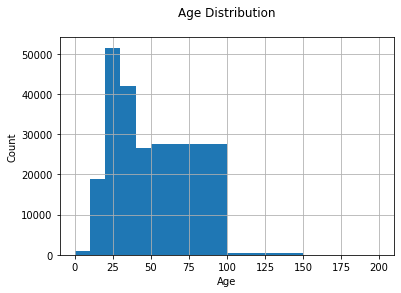

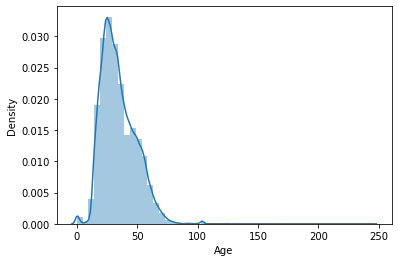

In [8]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100,150,200])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

sns.distplot(users['Age'])

Here we see the data for age column is little right skewed which is certainly due to outliers.<br><br> Majority users are in 20–40 age group.

Text(0.5, 1.0, 'Find outlier data in Age column')

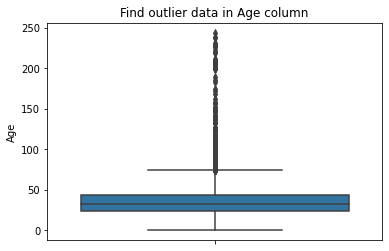

In [9]:
#checking for outliers

sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

In [10]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Here we can see age column have many outliers, values greater than 80 and less than 10 can be considered as outliers.

**Treating Nan and outlier values**

In [11]:

# outlier data became NaN
users.loc[(users.Age > 80) | (users.Age < 10), 'Age'] = np.nan

#treating NaN values with mean value
users['Age'].fillna(users['Age'].mean(),inplace=True)

users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

**ii) LOCATION**

In [12]:
#In location column we have multiple cities and country in a single column, so we will extract only the country
users.Location.nunique()

57339

In [13]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [14]:
users.Country.nunique()

518

In [15]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [16]:
users.head(2)

,User-ID,Age,Country
0,1,34.708846,usa
1,2,18.000000,usa


In [17]:
users.isnull().sum()

User-ID      0
Age          0
Country    450
dtype: int64

In [18]:
users['Country']=users['Country'].astype('str')

In [19]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn wÃ¼rtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedÃ\xa0', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'canada'

In [20]:
#treating the incorrect/misspelled names
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

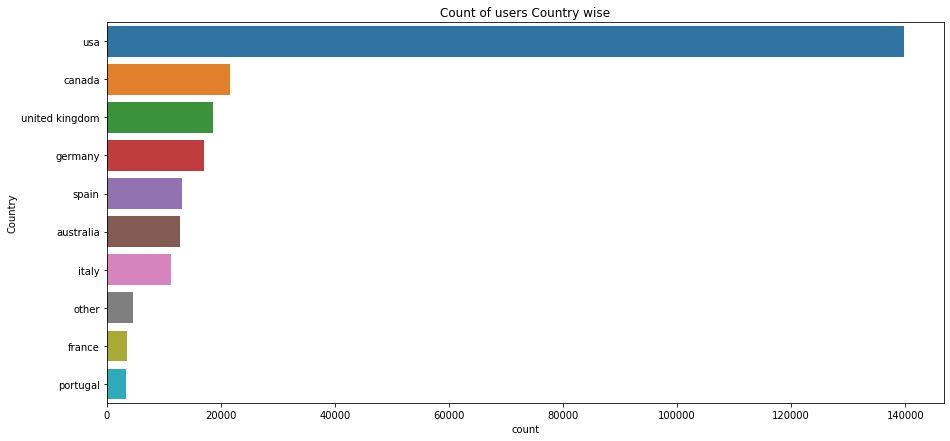

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')


Most number of users are from USA.

#**2. Books Dataset**

In [22]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [23]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [24]:
#checking for missing values in books dataset
missing_values(books)

,index,Missing Values,% of Total Values,Data_type
0,ISBN,0,0.0,object
1,Book-Title,0,0.0,object
2,Book-Author,1,0.0,object
3,Year-Of-Publication,0,0.0,object
4,Publisher,2,0.0,object
5,Image-URL-S,0,0.0,object
6,Image-URL-M,0,0.0,object
7,Image-URL-L,3,0.0,object


We have very few, almost negligible missing values in books dataset that can be ignored.

**Top 10 Authors which have written the most books**

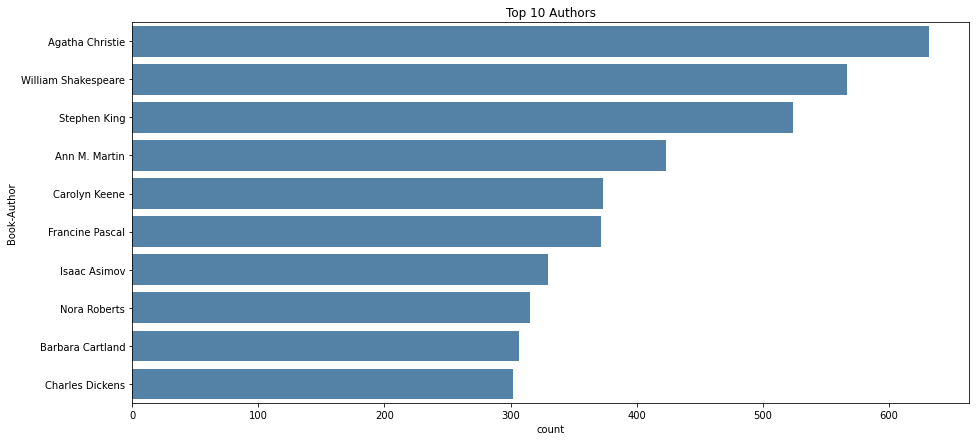

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index,color='steelblue')
plt.title('Top 10 Authors')
plt.show()

**Top 10 Publisher which have published the most books**

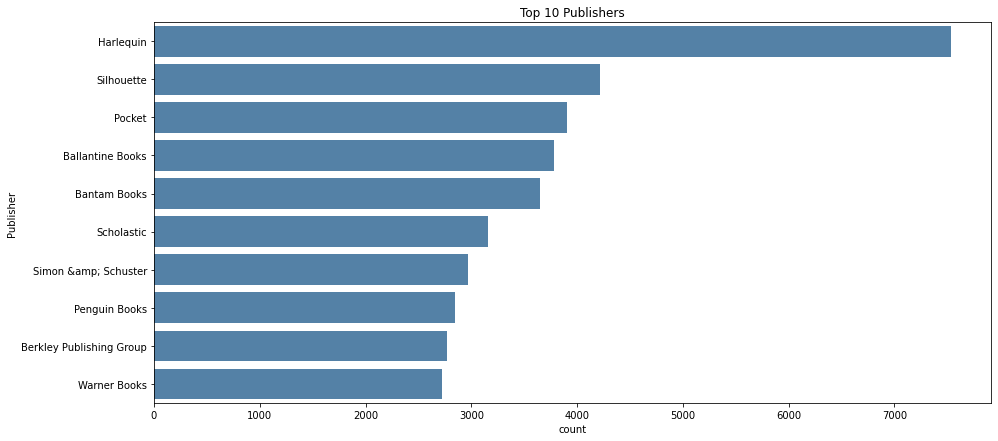

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index,color='steelblue')
plt.title('Top 10 Publishers')
plt.show()

In [27]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


**Top 10 years with most number of books published**

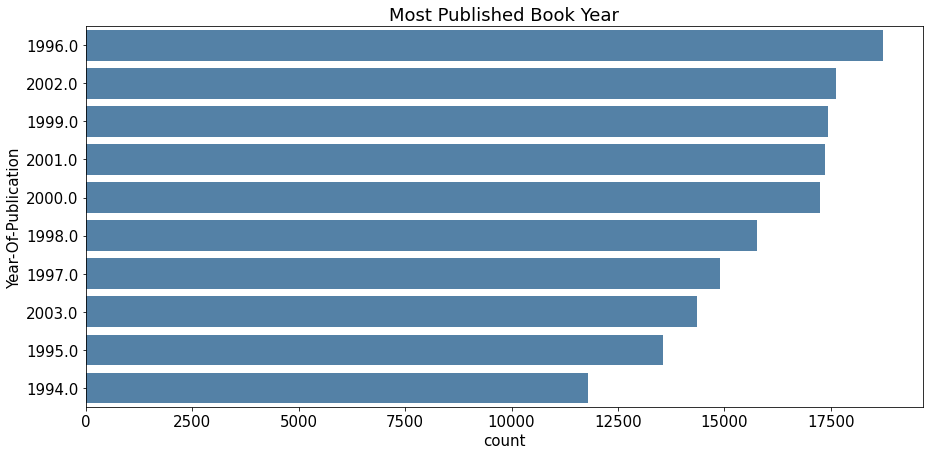

In [106]:
plt.figure(figsize=(15,7))
sns.countplot(y='Year-Of-Publication',data=books,order=pd.value_counts(books['Year-Of-Publication']).iloc[:10].index,color='steelblue')
plt.title('Most Published Book Years')
plt.show()

Maximum books are published in 1996 followed by 2002 ,1999 and 2001.

In [28]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file 

In [29]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [30]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [31]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [32]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('int')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


We can see there are outliers in year of publication column, the value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2004 to be 
invalid and setting invalid years as NaN.


In [33]:
books.loc[(books['Year-Of-Publication'] > 2004) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [34]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

#**3. Ratings Dataset**

In [35]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


Ratings dataset should have books only which exist in our books dataset


In [36]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.

In [37]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

In [38]:
#checking for any null values
missing_values(ratings)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,ISBN,0,0.0,object
2,Book-Rating,0,0.0,int64


**i) RATINGS**

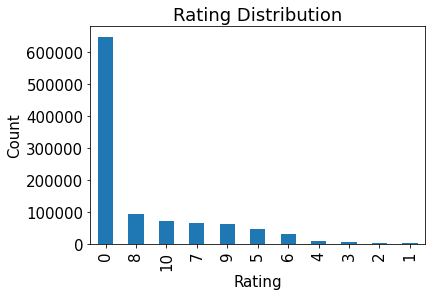

In [39]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 . We can observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

**Top 5 books wrt to number of ratings**

In [40]:
#creating a temp dataframe with non zero ratings
ratings1=ratings_new[ratings_new['Book-Rating']!=0]

In [41]:
rating_count = pd.DataFrame(ratings1.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [42]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


The book that received the most rating counts in this data set is Alice Sebold’s “The Lovely Bones: A Novel”.

In [43]:
# Create column Rating average 
ratings1['Avg_Rating']=ratings1.groupby('ISBN')['Book-Rating'].transform('mean')

# Create column Rating sum
ratings1['Total_No_Of_Users_Rated']=ratings1.groupby('ISBN')['Book-Rating'].transform('count')
ratings1['Total_books_rated_by_user']=ratings1.groupby('User-ID')['ISBN'].transform('count')

In [44]:
ratings1.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user
1,276726,0155061224,5,5.000000,1,1
3,276729,052165615X,3,3.000000,1,2
4,276729,0521795028,6,6.000000,1,2
8,276744,038550120X,7,7.580247,81,1
16,276747,0060517794,9,8.000000,30,5


#**Merging All Datasets**

In [45]:
df1=ratings1.merge(books, on='ISBN',how = 'left')
df1.head(1)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276726,0155061224,5,5.0,1,1,Rites of Passage,Judith Rae,2001.0,Heinle


In [46]:
missing_values(df1)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,ISBN,0,0.0,object
2,Book-Rating,0,0.0,int64
3,Avg_Rating,0,0.0,float64
4,Total_No_Of_Users_Rated,0,0.0,int64
5,Total_books_rated_by_user,0,0.0,int64
6,Book-Title,0,0.0,object
7,Book-Author,1,0.0,object
8,Year-Of-Publication,0,0.0,float64
9,Publisher,2,0.0,object


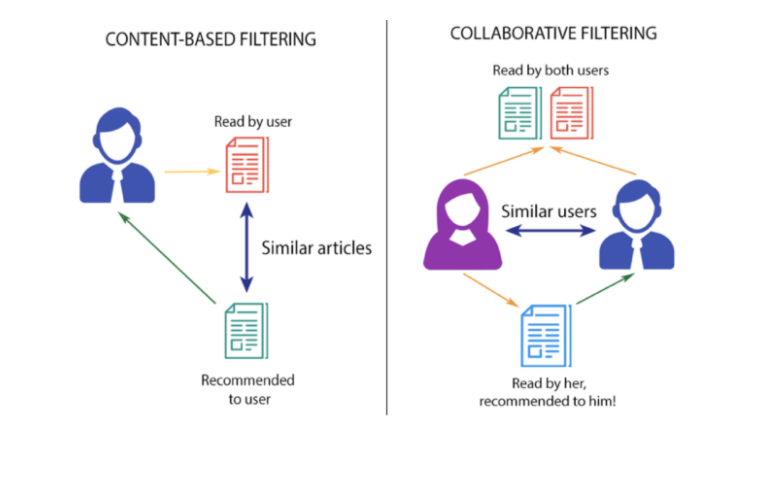

##**Importing modules**

In [48]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [49]:
#we are intrested in books that have explicit ratings ,which has over 100 total ratings and users with aleast 5 ratings

df_ratings_top1 = df1[df1['Total_No_Of_Users_Rated']>=100]
df= df_ratings_top1[df_ratings_top1['Total_books_rated_by_user']>=5]
df.head(1)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user,Book-Title,Book-Author,Year-Of-Publication,Publisher
153,276925,0385504209,8,8.435318,487,14,The Da Vinci Code,Dan Brown,2003.0,Doubleday


### **Choose a book and user for which you want to look for recommendendations**

In [50]:

#select a random book_id from given list
book_ids=[]
for i in range(9):
  m=random.choice(df['ISBN'].unique())
  book_ids.append(m)
print(book_ids)
print('select a book_id')
book_id=str(input())

#selected book
book_name = df.loc[df['ISBN'] == book_id, 'Book-Title'].values[0]
print('Selected Book:',book_name)

['1573229326', '0385335482', '0440220602', '0142001740', '0671003755', '0399501487', '0156027321', '0684874350', '044021145X']
select a book_id
1573229326
Selected Book: How to Be Good


# **1. Popularity Based**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.

In [51]:
#we are using 90th percentile as our cutoff. i.e for a book to feature in the charts, it must have more votes than at least 90% of the books in the list
C= df['Avg_Rating'].mean()
m= df['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = df.loc[df['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape


C=7.90296686333235 , m=313.0


(1693, 10)

In [52]:
#creating a function to give score to a book based on no of ratings and avg rating.
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [53]:
Top_Books.head(1)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user,Book-Title,Book-Author,Year-Of-Publication,Publisher,Score
201640,138995,059035342X,10,8.939297,313,39,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,8.421132


In [54]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(10)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Sorcerer's Stone (Harry P...,313,8.939297,8.421132
1,The Da Vinci Code,487,8.435318,8.227036
2,The Lovely Bones: A Novel,707,8.185290,8.098656
3,The Red Tent (Bestselling Backlist),383,8.182768,8.056938
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,320,7.887500,7.895148
5,Wild Animus,581,4.390706,5.620390


# **2. Memory Based Collabarative recommendation systems**

# **2.1 Collabarative filtering using K-Nearest Neighbors (KNN)**

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user.
<br><br>
Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.
For this reason, we are keeping in the dataset only users who have rated atleast 5 times and top 10 percent most rated books.

**Implementing kNN**

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [55]:
df.head(1)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user,Book-Title,Book-Author,Year-Of-Publication,Publisher
153,276925,0385504209,8,8.435318,487,14,The Da Vinci Code,Dan Brown,2003.0,Doubleday


In [56]:

corr_books = df.copy()
print(corr_books.shape)

corr_books.head(2)

(16065, 10)


,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user,Book-Title,Book-Author,Year-Of-Publication,Publisher
153,276925,0385504209,8,8.435318,487,14,The Da Vinci Code,Dan Brown,2003.0,Doubleday
217,276964,0440220602,9,7.431507,146,19,The Chamber,John Grisham,1995.0,Dell Publishing Company


In [57]:
#Creating a sparse pivot table with users in columns and book_titles in rows
corr_books_pivot = corr_books.pivot_table(index ='Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
corr_books_pivot.head(2)

User-ID,114,243,244,254,388,424,503,505,507,595,...,278188,278221,278356,278390,278418,278535,278552,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [58]:
#creating a user_item matrix and implementing knn model
from scipy.sparse import csr_matrix
corr_books_pivot_matrix = csr_matrix(corr_books_pivot.values)


from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(corr_books_pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

## **Testing Knn recommender model**

In [59]:
#we are intrested in finding the top 5 recommendations for a randomly selected book
recommendations=5
distances, indices = model_knn.kneighbors(corr_books_pivot.loc[book_name].values.reshape(1, -1), n_neighbors = recommendations+1)
print(f'Book Name: {book_name}')
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations:')
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, corr_books_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Book Name: How to Be Good
Recommendations:
1: The Hours: A Novel, with distance of 0.8718931692301131:
2: Good in Bed, with distance of 0.8848510359570989:
3: A Prayer for Owen Meany, with distance of 0.9002577764733415:
4: Balzac and the Little Chinese Seamstress : A Novel, with distance of 0.9003145628925128:
5: Empire Falls, with distance of 0.9046177759862897:


# **2.2 Collaborative Filtering Correlation Based**

In this correlation coefficient is used to recommend books. If the user likes a particular book, we take that books’s columns and find the correlation of that column with all the other books columns and get the books that highly correlate with the chosen book.

This works because, the rows represent users and a particular user might like similar books. Hence, we can use correlation coefficient to recommend movies to the users.

In [60]:
Top_Books=df.copy()
Top_Books.head(1)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user,Book-Title,Book-Author,Year-Of-Publication,Publisher
153,276925,0385504209,8,8.435318,487,14,The Da Vinci Code,Dan Brown,2003.0,Doubleday


In [61]:
#creating a function to recommend books based on correlation:

def correlated_books(no_of_recommendations):

  matrix = Top_Books.pivot_table(index='User-ID', columns='ISBN', values = 'Book-Rating').fillna(0)
  row = matrix.sample(n=1,axis='columns')
  correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
  corr = correlation.join(Top_Books['Total_No_Of_Users_Rated'])

  res = corr.sort_values('Pearson Corr', ascending=False).head(no_of_recommendations+1)[1:].index
  corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
  #bookname=Top_Books['book_title'].loc[Top_Books['ISBN']==row.columns[0]].reset_index(drop = True).iloc[0]
  print('Book Title :',book_name)
  print("\n Recommended Books: \n")
  return corr_books

## **Testing correlation recommendation model**

In [62]:
#we are intrested in finding the top n correlated books recommendations for the selected book
correlated_books(5)

Book Title : How to Be Good

 Recommended Books: 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0060392452,Stupid White Men ...and Other Sorry Excuses fo...,Michael Moore,2002.0,Regan Books
1,0060502258,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002.0,HarperTorch
2,0060915544,The Bean Trees,Barbara Kingsolver,1989.0,Perennial
3,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial
4,0060934417,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial


# **3. Model Based Collabarative recommendation systems**

#**3.1 Singular Value Decoposition(SVD) Recommendation System (user-item)**



The goal of CF-based recommendation algorithms is to suggest new recommendations based on the customer’s previous behavior. However, these systems have some problems like sparsity, scalability, and synonymy.  In order to remove noise data from a large and sparse database, some dimensionality reduction techniques such as Singular Value Decomposition (SVD) which is  Latent factor model and extract features and correlation from the user-item matrix.

Latent factor models compress user-item matrix into a low-dimensional representation in terms of latent factors and hence handles the sparsity of the original matrix better than memory based ones.


In [63]:

users_interactions_count_df = ratings1.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))


print('# of interactions: %d' % len(ratings1))
interactions_from_selected_users_df = ratings1.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))



print('# of interactions: %d' % len(ratings1))
interactions_from_selected_users_df = ratings1.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of users: 68091
# of users with at least 5 interactions: 449
# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271
# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [64]:
print('# of interactions: %d' % len(ratings1))
interactions_from_selected_users_df = ratings1.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [65]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user
0,2033,0030020786,7,7.000000,1,129
1,2033,0060248025,10,8.766667,30,129
2,2033,0060256664,10,8.333333,6,129
3,2033,0060256737,10,9.045455,22,129
4,2033,0060950536,10,9.400000,5,129
5,2033,0061020419,7,7.000000,1,129
6,2033,0061020427,6,6.000000,1,129
7,2033,0061056278,10,9.000000,2,129
8,2033,0061056286,8,7.666667,3,129
9,2033,0061056294,9,7.000000,2,129


In [66]:
import math

In [67]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.169925
1,0001046438,23902,3.321928
2,000104687X,23902,2.807355
3,0001047213,23902,3.321928
4,0001047973,23902,3.321928


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [70]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
87596,0879051213,95010,3.000000
52630,0515101230,129074,3.000000
68434,0679427724,75819,3.169925
85835,0843951346,135149,3.321928
92752,1551665727,158295,3.169925


In [71]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [75]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [76]:
users_items_pivot_matrix.shape

(449, 55743)

In [77]:
U.shape

(449, 15)

In [78]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [79]:
Vt.shape

(15, 55743)

In [80]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.48048195e-02,  2.31728082e-03,  2.74202603e-03, ...,
         2.27788796e-04,  5.49322969e-04,  1.26270997e-02],
       [-7.38279388e-04, -8.94254584e-04, -1.05816668e-03, ...,
         8.58241199e-05,  1.78651132e-04,  4.24690377e-03],
       [-2.00559626e-03, -1.73047641e-03, -2.04766350e-03, ...,
         1.78220412e-04,  4.04160623e-04,  7.29766631e-03],
       ...,
       [ 4.20550556e-03,  1.96625381e-03,  2.32665764e-03, ...,
         2.49809614e-04,  4.73258210e-04,  8.35154052e-03],
       [ 1.13675090e-02, -2.21445596e-03, -2.62035392e-03, ...,
         3.41186005e-04,  6.59446393e-04,  1.16707765e-02],
       [-1.44606285e-03,  5.14009860e-03,  6.08225124e-03, ...,
         8.58660344e-05,  1.46974496e-04,  2.89210573e-03]])

In [81]:
all_user_predicted_ratings.shape

(449, 55743)

In [82]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.014805,-0.000738,-0.002006,0.000747,-0.001927,-0.003498,-0.002684,0.006589,0.001398,0.013279,...,0.000506,0.003200,-0.001789,0.007501,-0.011989,0.001284,0.007515,0.004206,0.011368,-0.001446
000104687X,0.002317,-0.000894,-0.001730,0.016672,-0.000697,0.008500,0.013733,0.007379,-0.003087,0.015761,...,-0.002449,0.013465,-0.001160,0.013659,-0.004606,-0.006250,0.007927,0.001966,-0.002214,0.005140
0001047213,0.002742,-0.001058,-0.002048,0.019728,-0.000825,0.010058,0.016251,0.008732,-0.003653,0.018650,...,-0.002898,0.015933,-0.001372,0.016162,-0.005451,-0.007395,0.009380,0.002327,-0.002620,0.006082
0001047973,0.002742,-0.001058,-0.002048,0.019728,-0.000825,0.010058,0.016251,0.008732,-0.003653,0.018650,...,-0.002898,0.015933,-0.001372,0.016162,-0.005451,-0.007395,0.009380,0.002327,-0.002620,0.006082
000104799X,0.000983,0.000372,0.000752,0.002271,0.000237,0.001083,0.001158,0.002106,0.001664,0.003783,...,0.001298,0.002130,0.002638,0.001052,0.001605,0.002180,0.002125,0.000821,0.001370,0.000304


In [83]:
len(cf_preds_df.columns)

449

In [84]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [90]:
#Indexing by user id to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [86]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [87]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings1['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

##**Testing SVD model**

In [88]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

In [89]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  171118
Recommendation for User-ID =  171118
         ISBN                                         Book-Title  recStrength
0  0345350499                                The Mists of Avalon     0.358990
1  0441304834  Guilty Pleasures (Anita Blake Vampire Hunter (...     0.301797
2  0439136369  Harry Potter and the Prisoner of Azkaban (Book 3)     0.276577
3  0060987103  Wicked: The Life and Times of the Wicked Witch...     0.239375
4  0880382678     Test of the Twins (DragonLance Legends, Vol 3)     0.233026
5  0345367693               Diamond Throne (Elenium (Paperback))     0.220784
6  0441007813                                 Obsidian Butterfly     0.218121
7  0679735909                             Possession : A Romance     0.216856
8  0886775027                                        Blood Trail     0.215549
9  0064400557                   Charlotte's Web (Trophy Newbery)     0.203903


#**4. Content Based Recommendation system**

This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). 


In this model system recommends books by calculating similarities in Book Titles. For this, TF-IDF feature vectors were created for unigrams and bigrams of Book-Titles; only those books' data has been considered which are having at least 80 ratings.

In [91]:
df.head(1)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Total_books_rated_by_user,Book-Title,Book-Author,Year-Of-Publication,Publisher
153,276925,0385504209,8,8.435318,487,14,The Da Vinci Code,Dan Brown,2003.0,Doubleday


In [92]:
bookid= book_id
bookName = book_name
popular_book=df.copy()

In [104]:
#Trains a model composed by the main unigrams and bigrams found in the corpus, ignoring stopwords 

tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

print(f"Recommended Books for:'{book_name}'\n")
isbn = book_id
content = []

idx = popular_book.index[df['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < 5:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books for:'How to Be Good'

Good in Bed
Midnight in the Garden of Good and Evil: A Savannah Story
Little Altars Everywhere: A Novel
Life of Pi
Angels &amp; Demons


#**Conclusion**
###**EDA:**

* Majority of the readers were of the age bracket 20-40 and maximum users are from USA followed by Canada, UK and Germany.

* In ratings data, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.<br>
* Author with the most books are Agatha Christie, William Shakespeare and Stephen King.<br>
* Top Publishers are Harlequin, Silhoute, Pocket and Ballantine Books.

* Maximum books are published in year 1996 followed by 2002 ,1999 and 2001.

* Harry Potter and the Goblet of Fire, Harry Potter and the Sorcerer's Stone, Harry Potter and the Order of the Phoenix, How to Kill a Mockingbird are some of the most popular books in terms of avg rating and no of ratings.<br><br>

###**Book recommender Models:**

* For book recommender models, we have used popularity based, content based and collaborative filtering recommendation models.

* **In memory based collaborative filtering, KNN model and correlation models** were implemented. Whereas in model based SVD technique was implemented to get top 5 book recommendation for a selected book and a selected user.

* **Popularity based recommendation model** was also implemented which used a metric of weighted book score that is a indicator of how popular that book is based on no of ratings that book has got and average rating of the book. The books with highest scores were classified as most popular books.

* For **content based recommendation model** book title text is converted into a vector structure, and recommendations are made on basis of which book title seems more related with the selected book.
